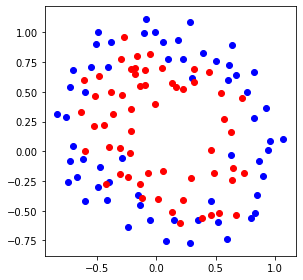

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0:1]
pointY  = data[:, 1:2]
label   = data[:, 2:3]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

In [ ]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [2]:
m = len(pointX)

zero_term = np.ones((1,m))
x = pointX.T
y = pointY.T
xy = x * y
x2 = x * x
y2 = y * y
x3 = x2 * x
x2y = xy * x
xy2 = xy * y
y3 = y2 * y
x4 = x2 * x2
x3y1 = x3 * y
x2y2 = xy * xy
x1y3 = xy2 * y
y4 = y2 * y2

feature = np.concatenate((zero_term, x, y, xy, x2, y2, 
                          x3, x2y, xy2, y3, x4, x3y1, 
                          x2y2, x1y3, y4), axis=0)

label = label.T

learning_rate = 0.03

theta = np. ones((15, 1))
theta[0,0]=20
theta[1,0]=5
theta[2,0]=5
theta[3,0]=1
theta[4,0]=10
theta[5,0]=10
theta[6,0]=1
theta[7,0]=1
theta[8,0]=1
theta[9,0]=1
theta[10,0]=1
theta[11,0]=1
theta[12,0]=1
theta[13,0]=1
theta[14,0]=1

list_theta_00 = list()
list_theta_01 = list()
list_theta_02 = list()
list_theta_03 = list()
list_theta_04 = list()

list_theta_05 = list()
list_theta_06 = list()
list_theta_07 = list()
list_theta_08 = list()
list_theta_09 = list()

list_theta_10 = list()
list_theta_11 = list()
list_theta_12 = list()
list_theta_13 = list()
list_theta_14 = list()

t = 1
iteration = list()
temp_j_value = 0
j_value = list()

accuracy_list = list()

In [3]:
while True:
    g = (theta.T).dot(feature)
    sigmoid = 1 / (1 + np.exp(-g))
    
    if t>1 and abs(temp_j_value - (-(np.sum((label*np.log(sigmoid))+(1-label)*np.log(1-sigmoid)))/m)) <= 0.000001:
        fin_theta = theta
        break
    temp_j_value = -(np.sum((label*np.log(sigmoid))+(1-label)*np.log(1-sigmoid)))/m
    j_value.append(temp_j_value)
    iteration.append(t)
    #print(t, temp_j_value, '\n')
    t += 1

    list_theta_00.append(theta[0,0])
    list_theta_01.append(theta[1,0])
    list_theta_02.append(theta[2,0])
    list_theta_03.append(theta[3,0])
    list_theta_04.append(theta[4,0])
    list_theta_05.append(theta[5,0])
    list_theta_06.append(theta[6,0])
    list_theta_07.append(theta[7,0])
    list_theta_08.append(theta[8,0])
    list_theta_09.append(theta[9,0])
    list_theta_10.append(theta[10,0])
    list_theta_11.append(theta[11,0])
    list_theta_12.append(theta[12,0])
    list_theta_13.append(theta[13,0])
    list_theta_14.append(theta[14,0])
    
    pred0 = (theta.T).dot(feature)
    pred1 = 1 / (1 + np.exp(-pred0))
    for i in range(118):
        if (pred1[0,i]>=0.5):
            pred1[0,i]=1
        else:
            pred1[0,i]=0
    correct = 0
    for i in range(118):
        if (pred1[0,i]==label[0,i]):
            correct +=1
    accuracy = correct / 118
    accuracy_list.append(accuracy)
    
    theta = theta - learning_rate * feature.dot((sigmoid-label).T) / m

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


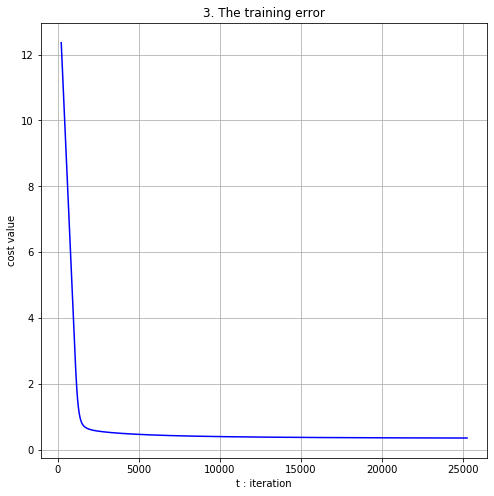

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(iteration, j_value, c = 'blue')
plt.xlabel('t : iteration')
plt.ylabel('cost value')
plt.title('3. The training error')
#plt.legend(['J(theta)'])
plt.grid()
plt.show()

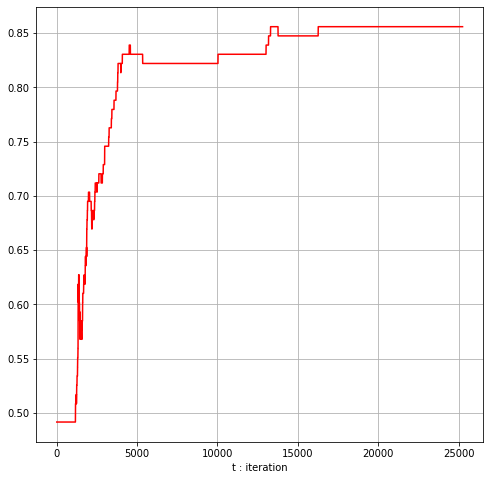

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(iteration, accuracy_list, c = 'red')
plt.xlabel('t : iteration')
#plt.ylabel('cost value')
#plt.title('3. The training error')
#plt.legend(['J(theta)'])
plt.grid()
plt.show()

KeyboardInterrupt: 

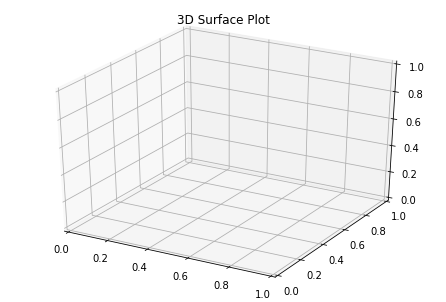

In [17]:
from mpl_toolkits.mplot3d import Axes3D
xlin = np.arange(-1, 1, 0.01)
ylin = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(xlin, ylin)
Z = (fin_theta[1,0]*X + fin_theta[2,0]*Y + fin_theta[3,0]*(X*Y)
     + fin_theta[4,0]*(X*X) + fin_theta[5,0]*(Y*Y) + fin_theta[6,0]*(X*X*X)
     + fin_theta[7,0]*(X*X*Y) + fin_theta[8,0]*(X*Y*Y) + fin_theta[9,0]*(Y*Y*Y)
     + fin_theta[10,0]*(X*X*X*X) + fin_theta[11,0]*(X*X*X*Y) + fin_theta[12,0]*(X*X*Y*Y)
     + fin_theta[13,0]*(X*Y*Y*Y) + fin_theta[14,0]*(Y*Y*Y*Y) + fin_theta[0,0])
sigmoids = 1 / (1 + np.exp(-Z))
#fig = plt.figure()
##ax = Axes3D(fig)
#ax.set_title("3D Surface Plot")
#ax.plot_surface(X, Y, sigmoids, rstride=1, cstride=1, cmap='coolwarm')
#plt.show()

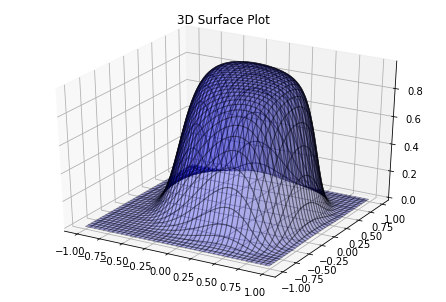

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("3D Surface Plot")
ax.plot_surface(X, Y, sigmoids, rstride=5, cstride=5, alpha=0.3, color = 'blue', edgecolor='black')
#ax.view_init(-30, 30)
plt.show()

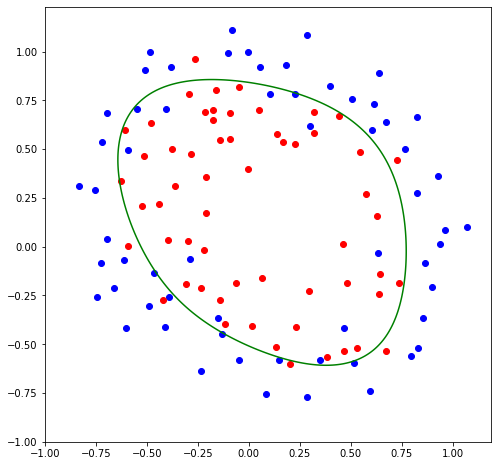

In [8]:
plt.figure(figsize=(8, 8))
plt.contour(X,Y,sigmoids,levels = [0.5],colors='green')
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

In [9]:
theta.shape

(15, 1)

In [10]:
(feature.dot((sigmoid-label).T)).shape

(15, 1)

In [11]:
df = (fin_theta.T).dot(feature)
sg = 1 / (1 + np.exp(-df))
for i in range(118):
    if (sg[0,i]>=0.5):
        sg[0,i]=1
    else:
        sg[0,i]=0

In [12]:
label.shape

(1, 118)

In [13]:
sum = 0
for i in range(118):
    if (sg[0,i]==label[0,i]):
        sum +=1
sum

101

In [14]:
sum/118

0.8559322033898306

In [15]:
fin_theta

array([[ 2.69702704],
       [ 2.3418623 ],
       [ 3.63289031],
       [-3.62127644],
       [-3.19030541],
       [-2.43678899],
       [-0.03340716],
       [-2.37803892],
       [-2.14444641],
       [-1.52311237],
       [-7.30548565],
       [ 0.67129527],
       [-3.09609916],
       [-1.006066  ],
       [-6.21031727]])